In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r'C:\Users\cheth\OneDrive\Desktop\ExcelR\Assignments\Cluestering\EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.drop(['ID#','Award?'],axis=1,inplace=True)

In [5]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [6]:
df.drop(['cc1_miles','cc2_miles','cc3_miles'],axis=1,inplace=True)

In [7]:
df

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [8]:
#from sklearn.preprocessing import  StandardScaler

In [9]:
#scaler=StandardScaler()

In [10]:
#scaled_df=scaler.fit_transform(df)
#scaled_df

In [11]:
#normalization function
def norm_function(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
#normalize the dataframe (considering numerical parameters)
scaled_df=norm_function(df)

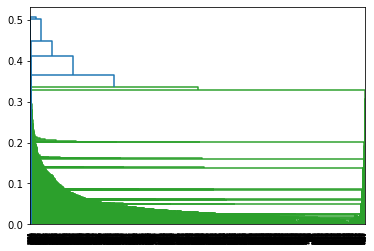

In [13]:
dendogram=sch.dendrogram(sch.linkage(scaled_df,method='single'))

In [14]:
#create clusters
hc= AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='single')

In [15]:
#save cluster for chart
y_hc=hc.fit_predict(scaled_df)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [16]:
y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [17]:
df['h_cluesterid']=hc.labels_

In [18]:
df

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_cluesterid
0,28143,0,174,1,0,0,7000,1
1,19244,0,215,2,0,0,6968,1
2,41354,0,4123,4,0,0,7034,1
3,14776,0,500,1,0,0,6952,1
4,97752,0,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,1
3995,64385,0,981,5,0,0,1395,1
3996,73597,0,25447,8,0,0,1402,1
3997,54899,0,500,1,500,1,1401,1


In [19]:
df.groupby('h_cluesterid').count()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
h_cluesterid,,,,,,,
0,2,2,2,2,2,2,2
1,3989,3989,3989,3989,3989,3989,3989
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1


In [ ]:
# Since number of data points are more Hierarchicl clustering taking too much time to compute data.
# This is not best clustering technique since number of data points will fall under one cluster.